#1. INTRODUCTION

**1.1 Problem Definition**

This project aims to evaluate the customer satisfaction rates of airlines and their services, including but not limited to: delays, in-cabin services, comfort, etc.
This project aims to evaluate how different customers respond to delays and services provided by airlines.

We will:

*   Understand the customers (eg. seat class, travel purpose, etc.)
*   Identify the factors of satisfaction rates (eg. delays, service, loyalty programs, coupons)
*   Examine reasons why customers stay loyal to certain airlines
Understand the correlation between the satisfaction standards/expectations and customer demographics

**1.2 Motivation**

According to a report by JP Morgan, the airline industry is all but certain to make gains in 2025, with both revenue and passenger numbers exceeding pre-pandemic numbers. As people that travel often by air, we wanted to examine the factors that go into customer satisfaction. By looking at consumer behaviors to services offered by airlines, we are looking to understand how different customers shape their expectations of travel experiences.

**1.3 Data Source**

**US Department of Transportation**: Air Travel Consumer Reports published monthly by US DoT on commercial airline flight delays, consumer complaints, etc. ([link](https://www.transtats.bts.gov/DataIndex.asp))

**UN Tourism Statistics Database**: Contains a comprehensive database of statistical information collected by the UN on the tourism sector ([link](https://www.untourism.int/tourism-statistics/tourism-statistics-database))

**SkyTrax**: Contains data on reviews on various different airlines, includes full review statements and also details different satisfaction factor ratings. ([link](airlinequality.com))


#2. Data Cleaning

- Dataset for delays contains either redundant or irrelevant columns for our purposes.
- Trimming the 'fat' around the data will be necessary to make analysis easier and faster

**2.1 Importing Libraries**

In [ ]:
import matplotlib.dates as mdates
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
import missingno as msno
import matplotlib.cm as cm
from IPython.display import Pretty as disp
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

**2.2 Data Import**
[import all datasets below at once]

In [ ]:
#import all datasets here
drive.mount('/content/drive', force_remount = True)

#_______ LOAD YOUR DATA BELOW THIS LINE __________
airline_review = pd.read_csv('drive/MyDrive/BA780TeamProject/Airline_review_USOnly_Updated.csv')
dot_delays = pd.read_csv('drive/MyDrive/BA780TeamProject/dot_delays.csv')
consumer_complaints = pd.read_csv('drive/MyDrive/BA780TeamProject/Consumer Complaints.csv')

Mounted at /content/drive


**2.3 Data Cleaning**

We will join 'dot_delays' and 'airline_review', and keep 'consumer_complaints' separate.

In [ ]:
#Display data tables for a one-panel view of the data tables and their columns.
#Visually, this makes it easier to understand columns to join.

display('dot_delays','airline_review', 'consumer_complaints')

,flight_date,op_unique_carrier,origin,origin_city_name,origin_state_abr,dest,dest_city_name,dest_state_abr,dep_delay,dep_delay_group,...,arr_delay_group,cancelled,cancellation_code,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-6.0,-1.0,...,-1.0,0,NaN,74.0,569,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-6.0,-1.0,...,-1.0,0,NaN,74.0,569,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-4.0,-1.0,...,-1.0,0,NaN,78.0,569,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,2.0,0.0,...,-1.0,0,NaN,75.0,569,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,12.0,0.0,...,0.0,0,NaN,79.0,569,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12948296,2020-12-31,WN,TUS,"Tucson, AZ",AZ,DEN,"Denver, CO",CO,-5.0,-1.0,...,-1.0,0,NaN,85.0,639,NaN,NaN,NaN,NaN,NaN
12948297,2020-12-31,WN,TUS,"Tucson, AZ",AZ,DEN,"Denver, CO",CO,-3.0,-1.0,...,-1.0,0,NaN,83.0,639,NaN,NaN,NaN,NaN,NaN
12948298,2020-12-31,WN,TUS,"Tucson, AZ",AZ,HOU,"Houston, TX",TX,21.0,1.0,...,1.0,0,NaN,130.0,945,0.0,0.0,1.0,0.0,21.0
12948299,2020-12-31,WN,TUS,"Tucson, AZ",AZ,LAS,"Las Vegas, NV",NV,-2.0,-1.0,...,-1.0,0,NaN,55.0,365,NaN,NaN,NaN,NaN,NaN


We also want to check the data types and columns of each dataset in a list view.

In [ ]:
airline_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1392 non-null   int64  
 1   Airline Name            1392 non-null   object 
 2   Overall_Rating          1392 non-null   object 
 3   Review_Title            1392 non-null   object 
 4   Review Date             1392 non-null   object 
 5   Verified                1392 non-null   bool   
 6   Review                  1392 non-null   object 
 7   Type Of Traveller       1340 non-null   object 
 8   Seat Type               1375 non-null   object 
 9   Date Flown              1337 non-null   object 
 10  Seat Comfort            1238 non-null   float64
 11  Cabin Staff Service     1225 non-null   float64
 12  Food & Beverages        772 non-null    float64
 13  Ground Service          1286 non-null   float64
 14  Inflight Entertainment  633 non-null    

In [ ]:
dot_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948301 entries, 0 to 12948300
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   flight_date          object 
 1   op_unique_carrier    object 
 2   origin               object 
 3   origin_city_name     object 
 4   origin_state_abr     object 
 5   dest                 object 
 6   dest_city_name       object 
 7   dest_state_abr       object 
 8   dep_delay            float64
 9   dep_delay_group      float64
 10  arr_delay            float64
 11  arr_delay_group      float64
 12  cancelled            int64  
 13  cancellation_code    object 
 14  air_time             float64
 15  distance             int64  
 16  carrier_delay        float64
 17  weather_delay        float64
 18  nas_delay            float64
 19  security_delay       float64
 20  late_aircraft_delay  float64
dtypes: float64(10), int64(2), object(9)
memory usage: 2.0+ GB


In [ ]:
consumer_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Carrier           996 non-null    object 
 1   Month             996 non-null    int64  
 2   Year              996 non-null    int64  
 3   Total Records     996 non-null    int64  
 4   % Ontime          996 non-null    float64
 5   Total Complaints  996 non-null    int64  
 6   Flight Problems   996 non-null    int64  
 7   Oversales         996 non-null    int64  
 8   Res/Tkt/Boarding  996 non-null    int64  
 9   Fares             996 non-null    int64  
 10  Refunds           996 non-null    int64  
 11  Baggage           996 non-null    int64  
 12  Customer Service  996 non-null    int64  
 13  Disability        996 non-null    int64  
 14  Advertising       996 non-null    int64  
 15  Other             996 non-null    int64  
dtypes: float64(1), int64(14), object(1)
memory u

Manually delete columns we won't use, while cross referencing data dictionary to verify each column's relevance to our project.


In [ ]:
#Cleaning: Standardize date columns

#Convert data types of date column into datetime
dot_delays['flight_date'] = pd.to_datetime(dot_delays['flight_date'])
airline_review['cleaned_date'] = airline_review['Review Date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
airline_review['Review Date'] = pd.to_datetime(airline_review['cleaned_date'], format='%d %B %Y')

In [ ]:
#lowercase column names in airline_review and replace spaces with '_'
airline_review.columns = airline_review.columns.str.replace(' ', '_')
airline_review.columns = airline_review.columns.astype(str).str.lower()

In [ ]:
#we'll rename the original date column later, bring the new standardized column to the left
airline_review_cols = airline_review.columns.tolist()
airline_review_cols.insert(0, airline_review_cols.pop(airline_review_cols.index('review_date')))
airline_review = airline_review[airline_review_cols]

In [ ]:
#Cleaning: Standardize airline names

#dot_delays and airline_review have different ways of displaying airline names
#We will only use the 9 major US airlines, for data clarity and similar sample sizes.
airline_map = {
    'American Airlines':'AA' ,
    'United Airlines': 'UA',
    'Delta Air Lines': 'DL',
    'Alaska Airlines': 'AS',
    'Frontier Airlines': 'F9',
    'Spirit Airlines': 'NK',
    'Southwest Airlines':' WN',
    'Hawaiian Airlines': 'HA',
    'Allegiant Air': 'G4'
}

#give dot_delays a column for airline names as well to join on later
dot_delays['airline_name'] = dot_delays['op_unique_carrier'].map(airline_map)

#we'll remove the original date column later, bring the new standardized column to the left
dot_delays_cols = dot_delays.columns.tolist()
dot_delays_cols.insert(1, dot_delays_cols.pop(dot_delays_cols.index('airline_name')))

dot_delays = dot_delays[dot_delays_cols]

In [ ]:
# List of values to drop
values_to_drop = ['Avelo Airlines', 'Breeze Airways','Cape Air','Ravn Alaska','Silver Airways',
                 'SkyWest Airlines','Sun Country Airlines']

# The ~ inverts the isin() result
# It selects rows where the city is NOT in the list
airline_review = airline_review[~airline_review['airline_name'].isin(values_to_drop)]

In [ ]:
#check output
dot_delays.info()
dot_delays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948301 entries, 0 to 12948300
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   flight_date          datetime64[ns]
 1   airline_name         object        
 2   op_unique_carrier    object        
 3   origin               object        
 4   origin_city_name     object        
 5   origin_state_abr     object        
 6   dest                 object        
 7   dest_city_name       object        
 8   dest_state_abr       object        
 9   dep_delay            float64       
 10  dep_delay_group      float64       
 11  arr_delay            float64       
 12  arr_delay_group      float64       
 13  cancelled            int64         
 14  cancellation_code    object        
 15  air_time             float64       
 16  distance             int64         
 17  carrier_delay        float64       
 18  weather_delay        float64       
 19  nas_delay          

,flight_date,airline_name,op_unique_carrier,origin,origin_city_name,origin_state_abr,dest,dest_city_name,dest_state_abr,dep_delay,...,arr_delay_group,cancelled,cancellation_code,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-6.0,...,-1.0,0,NaN,74.0,569,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-6.0,...,-1.0,0,NaN,74.0,569,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-4.0,...,-1.0,0,NaN,78.0,569,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,2.0,...,-1.0,0,NaN,75.0,569,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,12.0,...,0.0,0,NaN,79.0,569,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check output
dot_delays.info()
dot_delays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948301 entries, 0 to 12948300
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   flight_date          datetime64[ns]
 1   airline_name         object        
 2   op_unique_carrier    object        
 3   origin               object        
 4   origin_city_name     object        
 5   origin_state_abr     object        
 6   dest                 object        
 7   dest_city_name       object        
 8   dest_state_abr       object        
 9   dep_delay            float64       
 10  dep_delay_group      float64       
 11  arr_delay            float64       
 12  arr_delay_group      float64       
 13  cancelled            int64         
 14  cancellation_code    object        
 15  air_time             float64       
 16  distance             int64         
 17  carrier_delay        float64       
 18  weather_delay        float64       
 19  nas_delay          

,flight_date,airline_name,op_unique_carrier,origin,origin_city_name,origin_state_abr,dest,dest_city_name,dest_state_abr,dep_delay,...,arr_delay_group,cancelled,cancellation_code,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-6.0,...,-1.0,0,NaN,74.0,569,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-6.0,...,-1.0,0,NaN,74.0,569,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,-4.0,...,-1.0,0,NaN,78.0,569,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,2.0,...,-1.0,0,NaN,75.0,569,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,NaN,AA,ABQ,"Albuquerque, NM",NM,DFW,"Dallas/Fort Worth, TX",TX,12.0,...,0.0,0,NaN,79.0,569,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Cleaning: Memory optimization

#to save memory, convert some columns from float64 to Int16, as none of our values exceed +/- 32,767
cols_int_airline = ['seat_comfort','cabin_staff_service','food_&_beverages','ground_service',
               'inflight_entertainment','wifi_&_connectivity','value_for_money']

# Convert 'overall_rating' to numeric first, coercing errors, then to Int16
airline_review['overall_rating'] = pd.to_numeric(airline_review['overall_rating'], errors='coerce')
airline_review[cols_int_airline + ['overall_rating']] = airline_review[cols_int_airline + ['overall_rating']].astype('Int16')

cols_int_dot = ['dep_delay','dep_delay_group','arr_delay','arr_delay_group','cancelled','air_time','distance'
               ,'carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
dot_delays[cols_int_dot] = dot_delays[cols_int_dot].astype('Int16')


#dropping columns that aren't needed for our purposes
airline_cols_drop = ['unnamed:_0','review_title','date_flown','verified','review','cleaned_date']
airline_review = airline_review.drop(columns = airline_cols_drop)

dot_cols_drop = ['dest_city_name','dest_state_abr','origin_city_name','origin_state_abr']
dot_delays = dot_delays.drop(columns = dot_cols_drop)

#check work
dot_delays.info()
airline_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948301 entries, 0 to 12948300
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   flight_date          datetime64[ns]
 1   airline_name         object        
 2   op_unique_carrier    object        
 3   origin               object        
 4   dest                 object        
 5   dep_delay            Int16         
 6   dep_delay_group      Int16         
 7   arr_delay            Int16         
 8   arr_delay_group      Int16         
 9   cancelled            Int16         
 10  cancellation_code    object        
 11  air_time             Int16         
 12  distance             Int16         
 13  carrier_delay        Int16         
 14  weather_delay        Int16         
 15  nas_delay            Int16         
 16  security_delay       Int16         
 17  late_aircraft_delay  Int16         
dtypes: Int16(12), datetime64[ns](1), object(5)
memory usage: 1.0

In [ ]:
#Joining

#rename review_date now to join
airline_review.rename(columns={'review_date': 'flight_date'}, inplace=True)

merge_dot_review = pd.merge(dot_delays, airline_review, how='outer')
merge_dot_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12949201 entries, 0 to 12949200
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   flight_date             datetime64[ns]
 1   airline_name            object        
 2   op_unique_carrier       object        
 3   origin                  object        
 4   dest                    object        
 5   dep_delay               Int16         
 6   dep_delay_group         Int16         
 7   arr_delay               Int16         
 8   arr_delay_group         Int16         
 9   cancelled               Int16         
 10  cancellation_code       object        
 11  air_time                Int16         
 12  distance                Int16         
 13  carrier_delay           Int16         
 14  weather_delay           Int16         
 15  nas_delay               Int16         
 16  security_delay          Int16         
 17  late_aircraft_delay     Int16         
 18  

'consumer_complaints' dataset was loaded "to-order" from the Department of Transportation's website, and didn't need additional cleaning steps.

# 3. Exploratory Data Analysis

### **3.1 Consumer Demographic Information**

**Demographics**
First, we would like to identify the demographics of the customers:

*  Flight Class


*  Type of Travel

**Flight Class Distribution**

What flight class are these flyers booking?

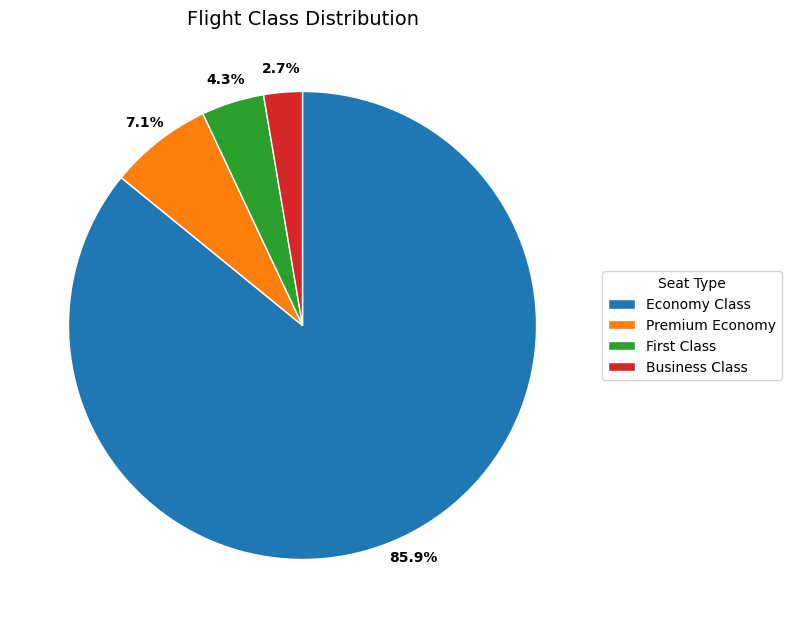

In [ ]:
seat_counts = merge_dot_review["seat_type"].value_counts()

#Simple pie charts to show proportion
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    seat_counts,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    labeldistance=1.1,
    pctdistance=1.1,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

plt.setp(texts, size=11)
plt.setp(autotexts, size=10, weight="bold", color="black")

plt.legend(
    wedges,
    seat_counts.index,
    title="Seat Type",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Flight Class Distribution", fontsize=14)
plt.tight_layout()
plt.show()

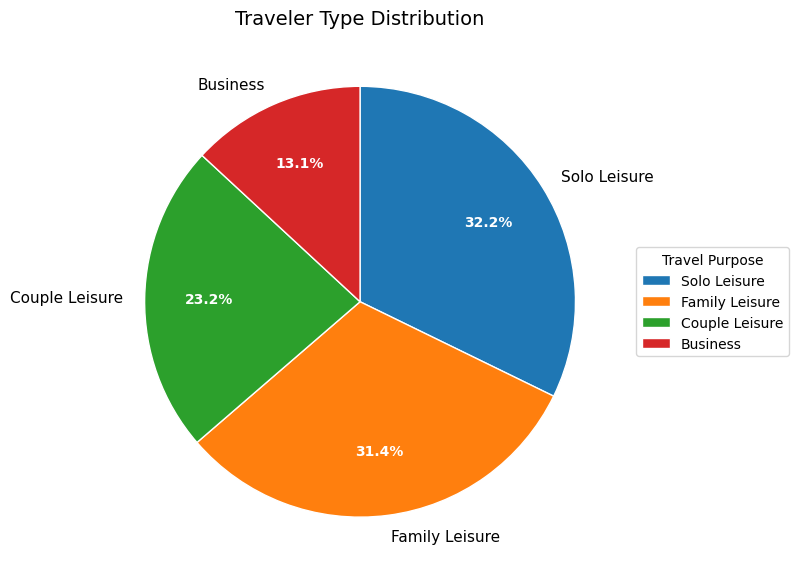

In [ ]:
type_of_traveller = merge_dot_review["type_of_traveller"].value_counts()

#Simple pie charts to show proportion
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    type_of_traveller,
    labels=type_of_traveller.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    labeldistance=1.1,
    pctdistance=0.7,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

plt.setp(texts, size=11)
plt.setp(autotexts, size=10, weight="bold", color="white")

plt.legend(
    wedges,
    type_of_traveller.index,
    title="Travel Purpose",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Traveler Type Distribution", fontsize=14)
plt.tight_layout()
plt.show()

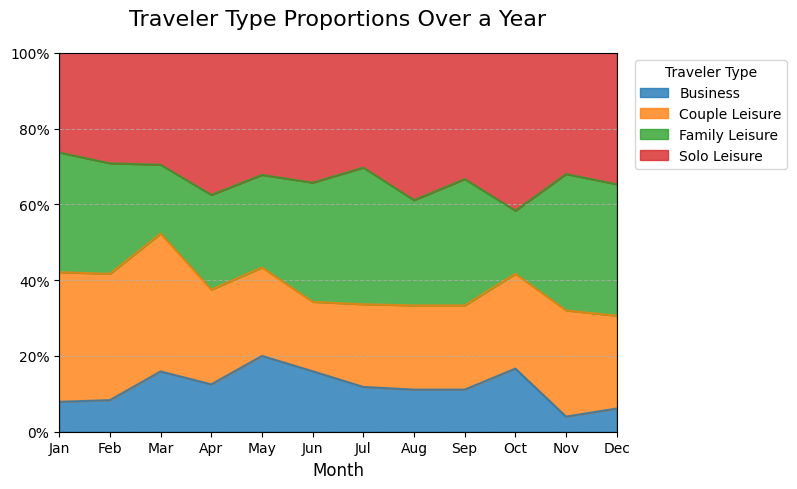

In [ ]:
merge_dot_review['month'] = merge_dot_review['flight_date'].dt.month
traveler_proportions = pd.crosstab(merge_dot_review['month'], merge_dot_review['type_of_traveller'], normalize='index')


#A stacked area graph made more sense to us over a stacked bar as it gave us better clarity on the changes of traveler type proportions throughout the year.
proportions_graph = traveler_proportions.plot(
    kind='area',
    stacked=True,
    figsize=(9, 5),
    alpha=0.8
)

proportions_graph.set_title('Traveler Type Proportions Over a Year', fontsize=16, pad=20)
proportions_graph.set_xlabel('Month', fontsize=12)

month_ticks = np.arange(1, 13)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
proportions_graph.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
proportions_graph.set_xticks(month_ticks)
proportions_graph.set_xticklabels(month_names)

proportions_graph.legend(title='Traveler Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.9, 1])

proportions_graph.set_xlim(1,12)
proportions_graph.set_ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### **3.2 Factors for Satisfaction / Complaints**

**Average Rating by Satisfaction Factor**
identify which satisfaction factors were rated the highest, and which were rated the lowest.

We started with a top-down overview of all 9 major US airlines and their overall ratings.

/tmp/ipython-input-3411824831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


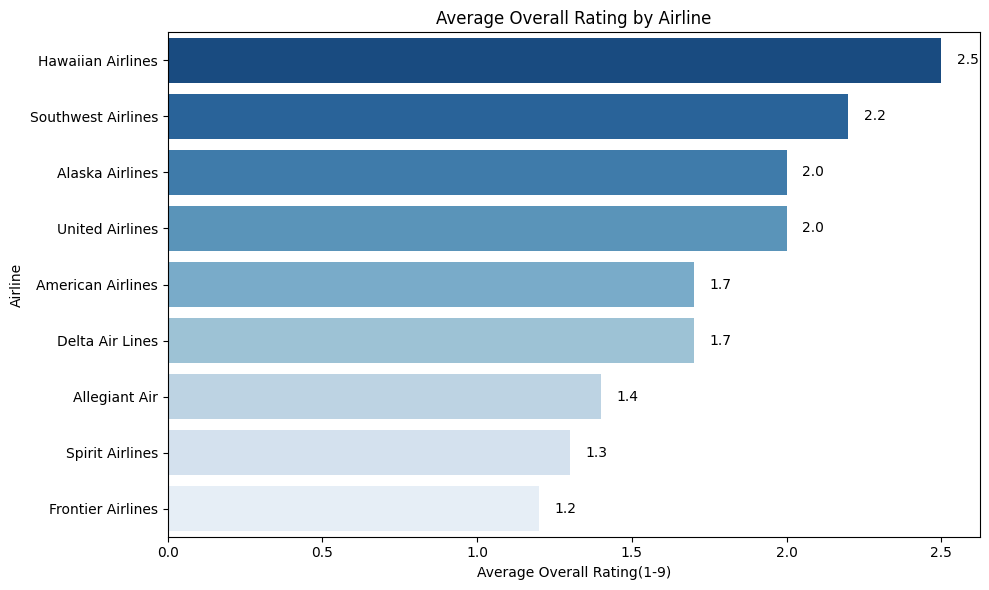

In [ ]:
airline_rank = (merge_dot_review.groupby('airline_name').agg(overall_rating=('overall_rating', 'mean'),review_count=('overall_rating', 'count')).round(1).sort_values(by='overall_rating', ascending=False))

# filtered airlines whith over 20 reivews
filtered_airline_rank = airline_rank[airline_rank['review_count'] > 20][['overall_rating']]
# print(airline_rank)
# print(filtered_airline_rank)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='overall_rating',
    y=filtered_airline_rank.index,
    data=filtered_airline_rank,
    palette="Blues_r",
    hue=None,
    legend=False
)


for i, v in enumerate(filtered_airline_rank['overall_rating']):
    ax.text(v + 0.05, i, f'{v:.1f}', color='black', va='center')

plt.title('Average Overall Rating by Airline')
plt.xlabel('Average Overall Rating(1-9)')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()


*   The average ratings for other U.S. airlines fall between 1.2 and 2.5—far below the maximum score of 10.
*   These ratings may reflect selection bias. Customers who had negative experiences are more likely to leave reviews, while those who were satisfied may not provide feedback. As a result, the average scores may skew lower than the true overall satisfaction.



After gaining a good sense for each airlines' overall ratings, we wanted to get more granular in our analysis to find out distributions of ratings from different classes of fliers.

In [ ]:
merge_dot_review["seat_type"] = pd.Categorical(merge_dot_review["seat_type"], categories=["Economy Class", "Premium Economy", "Business Class", "First Class"], ordered=True)

avg_rating_seattype = merge_dot_review.groupby('seat_type').mean(numeric_only=True)[fcols].round(1).reset_index()
avg_rating_seattype_melted = avg_rating_seattype.melt(id_vars='seat_type',var_name='category',value_name='rating')

plt.figure(figsize=(15, 8))
sns.barplot(data= avg_rating_seattype_melted , x='category', y='rating', hue='seat_type',palette='viridis')

plt.ylim(0, 5)
plt.title("Average Rating for Satisfaction Factor by Seat Type ", fontsize=18)
plt.xlabel("Satisfaction Factor", fontsize=16)
plt.ylabel("Average Rating", fontsize=16)
plt.xticks(rotation=0)
plt.legend(title="Seat Type", loc="upper left")
plt.show()

/tmp/ipython-input-1740896028.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_seattype = merge_dot_review.groupby('seat_type').mean(numeric_only=True)[fcols].round(1).reset_index()


NameError: name 'fcols' is not defined

*  First and Business Class receive the highest ratings across most satisfaction factors. Business Class outperforms First Class in some areas, such as inflight_entertainment, wifi_connectivity and value_for_money.
*   Premium Economy and Economy share similar rating profiles, suggesting that the upgrade may not deliver a significantly enhanced experience across satisfaction factors.



In [ ]:
merge_dot_review['overall_rating'] = pd.to_numeric(merge_dot_review['overall_rating'], errors='coerce')

plot_data = merge_dot_review.dropna(subset=['seat_type', 'overall_rating']).copy()
plot_data['seat_type'] = plot_data['seat_type'].replace({
    'Economy Class': 'Economy',
    'Business Class': 'Business',
    'First': 'First Class',
    'Premium': 'Premium Economy'
})

#Establishing seat order for organized visuals
seat_order = [
    'Economy',
    'Premium Economy',
    'Business',
    'First Class'
]

#Set figuresize and whitegrid for visual clarity
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

inner_line_kws = {
    'linewidth': 2.0,
    'linestyle': '--',
    'color': 'white'
}

#Violinplot will allow us to see distributions of ratings among different ticket classes
sns.violinplot(
    x='seat_type',
    y='overall_rating',
    data=plot_data,
    palette='viridis',
    inner='quartile',
    cut=0,
    order=seat_order,
    inner_kws=inner_line_kws
)

ax = plt.gca()
y_max = plot_data['overall_rating'].max()
plt.ylim(0.5, y_max + 0.5)

#In case of negative ratings, set a minimum rating
min_rating = 1
max_rating = int(y_max)
ax.set_yticks(range(min_rating, max_rating + 1))

plt.title('Distribution of Overall Rating by Seat Class', fontsize=16)
plt.xlabel('Seat Class', fontsize=12)
plt.ylabel('Overall Rating (Scale)', fontsize=12)
plt.show()

The analysis of customer ratings by seat class reveals a clear and expected trend: **as the class of service improves, customer satisfaction rises significantly, and the ratings become more consistently positive.** First Class passengers report the highest overall satisfaction, while Economy class passengers show the lowest median rating and the widest range of experiences, including the highest proportion and density of very poor reviews. Premium Economy serves as a substantial upgrade over Economy, successfully moving the bulk of customer experiences into the higher rating tiers.



In [ ]:
#Columns from the airline_review side of our dataset
fcols = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'ground_service', 'inflight_entertainment', 'wifi_&_connectivity',
       'value_for_money']

merge_dot_review[fcols] = merge_dot_review[fcols].apply(pd.to_numeric, errors='coerce')
avg_by_factor = merge_dot_review[fcols].mean().sort_values(ascending=False)

plt.figure(figsize=(9, 6))
avg_by_factor.plot(kind='barh',color = 'tomato')
plt.title("Average Rating by Satisfaction Factor")
plt.xlabel("Average Rating (1–5)")
plt.ylabel("Factors")
plt.gca().invert_yaxis()
plt.show()

From this graph, we're able to see that cabin_staff_service is actually ranked among the highest. When accounting for self-selection bias, this indicates that amenities (wifi, entertainment, seat comfort), and not customer care, make up a big portion of grievances among flyers.

In [ ]:
#From the consumer_complaints side of our dataset
complaint_cols = [
    "Flight Problems", "Oversales", "Res/Tkt/Boarding", "Fares",
    "Refunds", "Baggage", "Customer Service", "Disability",
    "Advertising", "Other"
]

for col in complaint_cols:
    consumer_complaints[col] = pd.to_numeric(consumer_complaints[col], errors='coerce')

complaints_by_airline = consumer_complaints.groupby(["Carrier", "Year"])[complaint_cols].sum().reset_index()
year_to_plot = complaints_by_airline["Year"].max()
subset = complaints_by_airline[complaints_by_airline["Year"] == year_to_plot]

#Create stacked bar chart for proportions on each airline
subset.set_index("Carrier")[complaint_cols].plot(
    kind="bar",
    stacked=True,
    figsize=(15,8)
)

#Labels
plt.title(f"Reasons for Complaints per Airline – 2018-2022")
plt.ylabel("Total Complaints")
plt.xlabel("Airline")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Complaint Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Since most passengers care most about getting to their destination on time, strong punctuality drives a higher staisfaction as well as a possible lower churn rate

Frequent delays and cancellations lead to frustration and more complaints.


As we look at the distribution of the top complaint categories we see that they are flight problems, baggage issues, refunds, and customer service.

*  Some airlines show higher complaint counts in specific areas, pointing to weak spots in operations or support.

*  Poor baggage handling and refund delays quickly lower satisfaction.

Clear communication and faster problem resolution help rebuild trust when things go wrong.

###**3.4 Airline Delays**

As delays/service interruptions take up the biggest portion of complaints for airline customers, we wanted to examine delays in depth to gain and understanding for certain airlines' puncutality, as well as examine factors that may be outside of airlines' control.

In [ ]:
consumer_complaints["% Ontime"] = pd.to_numeric(consumer_complaints["% Ontime"], errors="coerce")

ontime_by_year = (consumer_complaints.groupby(["Carrier", "Year"])["% Ontime"].mean().reset_index())

#Group carriers by On-time percentage
carrier_avg = ontime_by_year.groupby("Carrier")["% Ontime"].mean()
best_carrier = carrier_avg.idxmax()
worst_carrier = carrier_avg.idxmin()

plt.figure(figsize=(12,7))
sns.lineplot(
    data=ontime_by_year,
    x="Year",
    y="% Ontime",
    hue="Carrier",
    linewidth=1,
    alpha=0.7,
    palette="tab20",
)

#Clarify lines on best / worst performers
sns.lineplot(
    data=ontime_by_year[ontime_by_year["Carrier"] == best_carrier],
    x="Year",
    y="% Ontime",
    color="green",
    linewidth=3,
    marker="o",
    label=f"Highest: {best_carrier}"
)
sns.lineplot(
    data=ontime_by_year[ontime_by_year["Carrier"] == worst_carrier],
    x="Year",
    y="% Ontime",
    color="red",
    linewidth=3,
    marker="o",
    label=f"Lowest: {worst_carrier}"
)

#Labels
plt.title("On-Time Performance % per Airline by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average % On-Time Flights", fontsize=12)
plt.legend(title="Airline (Highlights in Bold)", bbox_to_anchor=(1.05, 1), loc="upper left")

best_y = ontime_by_year.loc[ontime_by_year["Carrier"] == best_carrier, "% Ontime"].max()
worst_y = ontime_by_year.loc[ontime_by_year["Carrier"] == worst_carrier, "% Ontime"].min()

#Labels that clearly show the best and worst performers
plt.text(
    x=ontime_by_year["Year"].max() + 0.1,
    y=best_y,
    s=f"⬆ {best_carrier}",
    color="green",
    fontweight="bold"
)
plt.text(
    x=ontime_by_year["Year"].max() + 0.1,
    y=worst_y,
    s=f"⬇ {worst_carrier}",
    color="red",
    fontweight="bold"
)

plt.xticks(sorted(ontime_by_year["Year"].unique()))
plt.yticks(range(int(ontime_by_year["% Ontime"].min()) - 1, int(ontime_by_year["% Ontime"].max()) + 2, 2))

plt.tight_layout()
plt.show()

print(f"Highest On-Time Performer: {best_carrier} ({carrier_avg[best_carrier]:.2f}%)")
print(f"Lowest On-Time Performer: {worst_carrier} ({carrier_avg[worst_carrier]:.2f}%)")



Improving schedule reliability is one of the most direct ways to make travelers happier.

*   Hawaiian Airlines has the best on-time redord at about 87% while Allegiant Air has around 73% around this time.
*   Most Major carriers like Delta, Alaska and American stay roughly unchanged in this time period - sticking around mid 80% range.





In [ ]:
#Create two new data tables to make grouping by averages easier.
avg_dep_delays = merge_dot_review.groupby('origin')['dep_delay'].mean().rename('avg_departure_delay')
avg_arr_delays = merge_dot_review.groupby('dest')['arr_delay'].mean().rename('avg_arr_delay')

#Since we want to view arrival and departure delays side by side, merge the two tables created earlier.
delay_summary = pd.merge(
    avg_dep_delays,
    avg_arr_delays,
    left_index=True,
    right_index=True,
    how='outer'
).fillna(0)

#Filter by the 20 busiest airports for visual clarity and highest relevance
flight_counts = pd.concat([merge_dot_review['origin'], merge_dot_review['dest']]).value_counts()
busiest_airports = flight_counts.nlargest(20).index
plot_data = delay_summary.loc[busiest_airports].sort_values('avg_departure_delay')
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(plot_data.index))
width = 0.4

dep_del_bars = ax.bar(x - width/2, plot_data['avg_departure_delay'], width,
                label='Departure Delay', color='#3498db')

arr_del_bars = ax.bar(x + width/2, plot_data['avg_arr_delay'], width,
                label='Arrival Delay', color='#e74c3c')

ax.set_title('Average Departure vs. Arrival Delay by Airport', fontsize=16, pad=20)
ax.set_ylabel('Average Delay (Minutes)', fontsize=12)
ax.set_xlabel('Airport', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(plot_data.index, rotation=45)
ax.legend()
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
#There were changes made to data types for this visualization, so airport_df was made retroactively to avoid corrupting merge_dot_review
airport_df = dot_review.copy()
airport_df['dep_delay'] = pd.to_numeric(airport_df['dep_delay'], errors='coerce')
airport_df['dep_delay'] = airport_df['dep_delay'].fillna(0)

#Similar to earlier visualizations, we will filter by the 20 busiest airports
all_airport_activity = pd.concat([airport_df['origin'], airport_df['dest']])
top_20_airports = all_airport_activity.value_counts().nlargest(20).index
busy_airports_dep = airport_df[airport_df['origin'].isin(top_20_airports)]

#Create a pivot table, which fits into our heatmap matrix
airport_pivot_dep = busy_airports_dep.pivot_table(
    index='op_unique_carrier',
    columns='origin',
    values='dep_delay',
    aggfunc='mean'
).fillna(0)

#Had to ensure all values in the pivot table were floats instead of string object.
airport_pivot_dep = airport_pivot_dep.astype(float)

#Heatmap
plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    airport_pivot_dep,
    annot=True,
    cmap='YlOrRd',
    fmt=".0f",
    linewidths=.5
)

#Labels
ax.set_title('Average Departure Delay (Minutes) by Airline and Airport', fontsize=16, pad=20)
ax.set_xlabel('Airport of Origin', fontsize=12)
ax.set_ylabel('Airline Code', fontsize=12)
plt.show()

In [ ]:
#Same process as the delay heatmap, but for arrivals
busy_airports_arr = airport_df[airport_df['dest'].isin(top_20_airports)]

airport_pivot_arr = busy_airports_arr.pivot_table(
    index='op_unique_carrier',
    columns='dest',
    values='arr_delay',
    aggfunc='mean'
).fillna(0)

airport_pivot_arr = airport_pivot_arr.astype(float)

#Heatmap
plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    airport_pivot_arr,
    annot=True,
    cmap='YlGnBu',
    fmt=".0f",
    linewidths=.5
)

#Labels
ax.set_title('Average Arrival Delay (Minutes) by Airline and Airport', fontsize=16, pad=20)
ax.set_xlabel('Airport of Arrival', fontsize=12)
ax.set_ylabel('Airline Code', fontsize=12)
plt.show()

By looking at delays through the lens of airports along with airlines, we're able to see that certain airports (New Jersey Newark, Chicago O'Hare, Dallas Fort Worth, Chicago Midway, Boston Logan) cause longer delays than others. This indicates that for some airports, airlines are at the mercy of the airports' operational capabilities when it comes to delays.

In [ ]:
delay_reason = merge_dot_review.copy()
carrier_col = 'op_unique_carrier'

delay_cols = [
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay'
]

delay_totals = delay_reason.groupby(carrier_col)[delay_cols].sum().reset_index()

delay_totals['Total_Delay'] = delay_totals[delay_cols].sum(axis=1)

delay_totals = delay_totals[delay_totals['Total_Delay'] > 0]

top_carriers = delay_totals.sort_values(by='Total_Delay', ascending=False).head(10)[carrier_col].tolist()
plot_data = delay_totals[delay_totals[carrier_col]].copy()

proportions = plot_data.set_index(carrier_col)[delay_cols].apply(
    lambda x: x / x.sum(),
    axis=1
).reset_index()

plot_ready_df = proportions.set_index(carrier_col)
plt.figure(figsize=(12, 8))

#Stacked bar chart to show proportions of delays per airline.
plot_ready_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='viridis',
    ax=plt.gca()
)

#Labels
plt.title('Proportional Distribution of Delay Types by Airline (Top 10 by Total Delay Minutes)', fontsize=16)
plt.xlabel('Airline Carrier Code', fontsize=12)
plt.ylabel('Proportion of Total Delay Time', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



The analysis of delay types for the top 10 airlines shows that most delay minutes are caused by factors that airlines can control or manage through scheduling. **Carrier Delay** and **Late Aircraft Delay** make up the majority of total delays for almost every major airline. This means that flight delays are mainly an operational and scheduling issue, not something mostly caused by outside factors. Weather, security, and National Airspace System (NAS) delays are less significant, suggesting that improving internal operations and scheduling efficiency offers the biggest chance to reduce total delay time.




# **# 4. Conclusion**

Overall, in this section of the project, we tried to gain a better understanding of overall trends and consumer demographics in the US domestic airline industry. Some risks/blindsides in our analysis lies in the lack of cohesion across the datasets, which makes it difficult to extrapolate data/findings across our datasets. This is something we will address as the project progresses into the final stage.

Our analysis highlights that customer satisfaction in airlines is shaped less by broad industry factors and more by direct, personal touchpoints in the passenger journey.  As shown in Visualization 2, the strongest drivers of satisfaction are cleanliness, crew service, and seating comfort, which consistently scored higher across travelers. These factors set the baseline for whether passengers perceive their trip as acceptable or disappointing.

Segment analysis further showed that business travelers and leisure travelers have distinct expectations. Business travelers value punctuality and digital efficiency, such as online check-in and Wi-Fi, while leisure travelers prioritize comfort, food, and entertainment. Airlines that adapt offerings based on traveler type can capture satisfaction more effectively.

At the same time, the data sets (such as the Department of Transport’s) data is open to possible gaps since it is clearly mentioned that the information that they have collected is directly from the airline carriers themselves. This could potentially lead to bias through omission of key data since the airlines would have incentives to not portray themselves in any negative light. Some other risks/blindsides in our analysis lies in the lack of cohesion across the datasets, which makes it difficult to extrapolate data/findings across our datasets. This is something we will address as the project progresses into the final stage.

In short, airlines that prioritize reliability, strengthen baseline service quality, tailor experiences by traveler type, and act on feedback data will see the largest gains in satisfaction and loyalty. These findings point toward actionable improvements that not only enhance passenger experience but also position airlines to sustain competitive Airlines on-time arrivals by ranking advantage in a customer-centric market.



**Key Findings:**

1.	Flight Class Composition:
Economy Class makes up about 86 percent of all passengers showing that most travelers choose budget-friendly options. Business and Premium Economy together account for roughly 13 percent while First Class represents less than one percent. This indicates that any improvement in the economic segment would have the widest impact on overall customer satisfaction.

2.	Traveler Type Distribution:
Leisure travel dominates with solo, couple, and family trips making up about 86 percent of total travelers. Business travelers make up only 14 percent reflecting a shift toward remote and hybrid work. Airlines should focus more on comfort and entertainment rather than business amenities.

3.	Seat Class and Ratings:
Customer satisfaction increases with higher seat classes. Business and First-Class passengers report higher ratings while Economy shows the greatest variation. This suggests that while premium services meet expectations, the economic experience is inconsistent and needs improvement.

4.	Satisfaction Factors:
Cabin staff service receives the highest ratings around 3 out of 5, showing that staff interactions are a major strength. Wi-Fi and connectivity score the lowest at about 1.8 followed by in-flight entertainment and ground service. Value for money and seat comfort fall in the middle which means passengers appreciate good service but expect better reliability and comfort.

5.	Complaints by Airline:
American Airlines, United Airlines, and Spirit Airlines have the highest complaint volumes. Hawaiian Airlines continues to receive the fewest complaints aligning with its strong operational record. The top complaint areas are flight problems, baggage issues, and customer service. These areas contribute most to overall dissatisfaction and should be the focus for improvement.

6.	On-Time Performance by Year
Hawaiian Airlines remains the most punctual averaging close to 90 percent on-time flights. Allegiant Air continues to perform the worst, falling below 70 percent in 2022. The overall industry saw performance peak in 2021 but decline again in 2022 suggesting ongoing recovery challenges after the pandemic.

7.	Airport Delays
Newark, Chicago O’Hare, and Dallas–Fort Worth have the longest average delays. Seattle, Detroit, and Minneapolis perform best with minimal delays. Departure delays are consistently higher than arrival delays indicating issues in ground handling and scheduling rather than air traffic.

**Recommendations:**

1.	Improve Operational Efficiency
Focus on reducing delays at key problem airports through better scheduling, real-time tracking, and improved coordination with airport authorities. Use predictive maintenance to minimize aircraft turnaround time.

2.	Enhance Passenger Experience
Invest in stronger Wi-Fi and more reliable entertainment systems. For economy travelers, prioritize seat comfort, communication during disruptions, and faster baggage handling to improve consistency and satisfaction.

3.	Refine Customer Strategy
Since most travelers are leisure-focused, introduce family and couple-oriented offers, loyalty programs, and vacation partnerships. Continue to serve business travelers but scale investments in premium capacity according to actual demand.

4.	Reduce Complaints Proactively
Address the root causes of the top complaint areas: flight problems, baggage, and customer service. Provide staff with clearer escalation procedures and use complaint data to identify recurring issues quickly.

5.	Benchmark and Monitor Performance
Use Hawaiian and Delta Airlines as benchmarks for reliability and service. Track quarterly performance on on-time rates and complaints to identify trends and respond before they impact reputation or revenue.


**Challenges:**

One of the key challenges faced during the project was the difficulty in loading large datasets into Google Colab. The file size exceeded Colab’s memory limits which often caused session crashes and slow processing times. To overcome this, we moved our analysis to Jupyter Notebook, which provided more flexibility and better handling of large data volumes.

Another major challenge was related to the Consumer Complaints dataset. The Department of Transportation changed the reporting format in recent years, and detailed breakdowns of complaints by airline are no longer available in the same level of granularity. This limited our ability to make direct year-on-year comparisons and required us to adapt our analysis accordingly.

The large size of the datasets also made the data cleaning process demanding. We had to sift through thousands of rows to remove inconsistencies, missing values, and duplicate entries before analysis could begin. Ensuring accuracy while maintaining efficiency took significant effort.

Finally, the time frame of our study included the COVID-19 pandemic, which heavily disrupted the airline industry. Some airlines in our dataset, such as ExpressJet, ceased operations in 2020 and later filed for bankruptcy in 2022. This introduced additional variability in the data that had to be considered while interpreting trends over time.


##Gen-AI Disclosure

In this assignment, we have utilized generative AI to assist with our work processes. We have used GenAI in assistance for:
* Code generation: We used TerrierGPT-4 and Gemini to assist with visualization parameters
* Code Review and Debugging: Gemini and ChatGPT suggested ways to improve our Python code and resolve potential errors
* Grammar checks: We used ChatGPT to check if we had any spelling or grammar errors

Our team has also made efforts in reviewing any work generated by AI to ensure its accuracy and quality. Every step of this notebook has been manually verified for the correct data used, as well as its metrics.